# DSCI 100: Project Planning - Tuna Sayin
In this document, I will analyze 2 of the dataset we have (players, sessions) and will explain these datasets. Further on I will select one broad and one specific question and explian why I chose this question. After selecting the questions, for answering the questions bettter, I will visualize the dataset we have to answer according to the questions and then will recommend how to proceed from there on.

Please, run the cell below.

In [36]:
install.packages(c("tidyverse", "tidymodels", "cowplot", "skimr", "janitor", "lubridate", "ggplot2"))
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)


The downloaded binary packages are in
	/var/folders/m_/1h9y57qn4759pt85y0jmqcv00000gn/T//RtmpBKFz3l/downloaded_packages


## Loading and Understanding the Datasets
Let's start by loading the datasets, for better practice I will split this part into 2. We will start by discovering first players dataset then sessions to better understand the datasets we have. We will underline the columns of each of the dataset and try to understand the dataset.

Both of the datasets are collected from a minecraft server called Plaicraft that got setup to collect player data and their gameplay sessions to be able to answer few questions regarding a research. More details on the minecraft server can be found [here](https://plaicraft.ai/).

### Exploration of players dataset

In [37]:
players <- read_csv("data/players.csv")
glimpse(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


As we can see above, players dataset has 7 columns and 196 rows.

Here is the explanation of the columns in this dataset:
- experinece: Player's experience
- subscribe: Player subribed or not
- hashedEmail: Player's email in hashed version
- played_hours: Hours played by that player
- name: Player's name
- gender: Player's gender
- Age: Player's age

#### Summary statistics for the values in players
Please run the cell below the get the summary statistics for the values in the players dataset.

In [38]:
# Numerical stats
players |>
  select(where(is.numeric)) |>
  summarise(across(everything(),
                   list(mean = ~round(mean(.x, na.rm = TRUE), 2),
                        median = ~round(median(.x, na.rm = TRUE), 2),
                        min = ~round(min(.x, na.rm = TRUE), 2),
                        max = ~round(max(.x, na.rm = TRUE), 2))))
# Gender stats
players |> count(gender) |>
  mutate(percentage = round(n / sum(n) * 100, 2))

# Experience stats
players |> count(experience) |>
  mutate(percentage = round(n / sum(n) * 100, 2))

played_hours_mean,played_hours_median,played_hours_min,played_hours_max,Age_mean,Age_median,Age_min,Age_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,0.1,0,223.1,21.14,19,9,58


gender,n,percentage
<chr>,<int>,<dbl>
Agender,2,1.02
Female,37,18.88
Male,124,63.27
Non-binary,15,7.65
Other,1,0.51
Prefer not to say,11,5.61
Two-Spirited,6,3.06


experience,n,percentage
<chr>,<int>,<dbl>
Amateur,63,32.14
Beginner,35,17.86
Pro,14,7.14
Regular,36,18.37
Veteran,48,24.49


#### Potential issues/limitations with players.csv
- Age distributions seems to be pretty wide ranging from 9 to 58; This wide range can be because of player's entering wrong personal detials which may cause potential errors in our further predictions
- Male gender seems to be prominent among the dataset; This can also cause a problem in accuracy when making predictions further
- Players with 0 played_hours; Some players have 0 played hours, so they don't really help with analyzing user behaviour however their data exists in the table making the entry redundant

### Exploration of sessions dataset

In [39]:
sessions <- read_csv("data/sessions.csv")
glimpse(sessions)

Rows: 1535 Columns: 5


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


As we can see above, sessions dataset has 5 columns and 1535 rows.

Here is the explanation of the columns in this dataset:
- hashedEmail: Hashed version of the player's email (key to identify the row)
- start_time: Session start time
- end_time: Session end time
- original_start_time: Start timestamp
- original_end_time: End timestamp

#### Summary statistics for the values in sessions
Please run the cell below the get the summary statistics for the values in the sessions dataset.

In [40]:
sessions |>
  select(where(is.numeric)) |>
  summarise(across(everything(),
                   list(mean = ~round(mean(.x, na.rm = TRUE), 2),
                        median = ~round(median(.x, na.rm = TRUE), 2),
                        min = ~round(min(.x, na.rm = TRUE), 2),
                        max = ~round(max(.x, na.rm = TRUE), 2))))

original_start_time_mean,original_start_time_median,original_start_time_min,original_start_time_max,original_end_time_mean,original_end_time_median,original_end_time_min,original_end_time_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,1.7192e+12,1.7124e+12,1.72733e+12,1.719196e+12,1.71918e+12,1.7124e+12,1.72734e+12


#### Potential issues/limitations with sessions.csv
- No session ID; Session entries does not have a unique id to identify each of them which may cause us to get confused when trying to identify each of the session if we ever need to
- Short duration sessions; We don't really know if these short sessions are solid gameplay's or a result of potential technical problem with player's gameplay. This can also cause inaccuracy in prediciton in the further predicition

### Summary of dataset exploration
In summary, we have 2 dataset files. The first file ("players.csv"), lists each of the player's personal details that played on the minecraft server. We have their personal details like their age, name, gender, etc.
The second file ("sessions.csv"), has records of every gameplay session for every player that played on the minecraf server. 

By combining these 2 datasets, throughout hashedEmail column we can exmaine how player characteristics relate to engagement behaviours such as playtime or session amount. Discovering this type of relation can help us further predict more variables

## Questions
Now that we have explored our datasets, it's time to step into the questions.

### Broad question
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific question
Do a player’s age, gender, or playtime influence their likelihood of subscribing to the newsletter?

### How the data we have will answer this question?
To address this question, I will merge both of the datasets, and will link every player's entry with their gameplay sessions. I will calculate the total playtime of each of the player. Then to better understand the relation between each of the explaratory variable with the response variable I will create plots for each of them. Then by anaylzing the result of each of the plot, I will try to conclude a result.

## Creating Plots For Answering Our Question
To better answer our specific question we will create plots for each of the relation.

### Subscription Rate by Gender
To answer our question, we start by analyzing the subscription rate by gender. The subscription rate does not exist as column so by making a small data wrangling (getting the mean value of subscribe=true) we achieve the subscription rate. Run the cell below the create the plot.

Joining with `by = join_by(hashedEmail)`


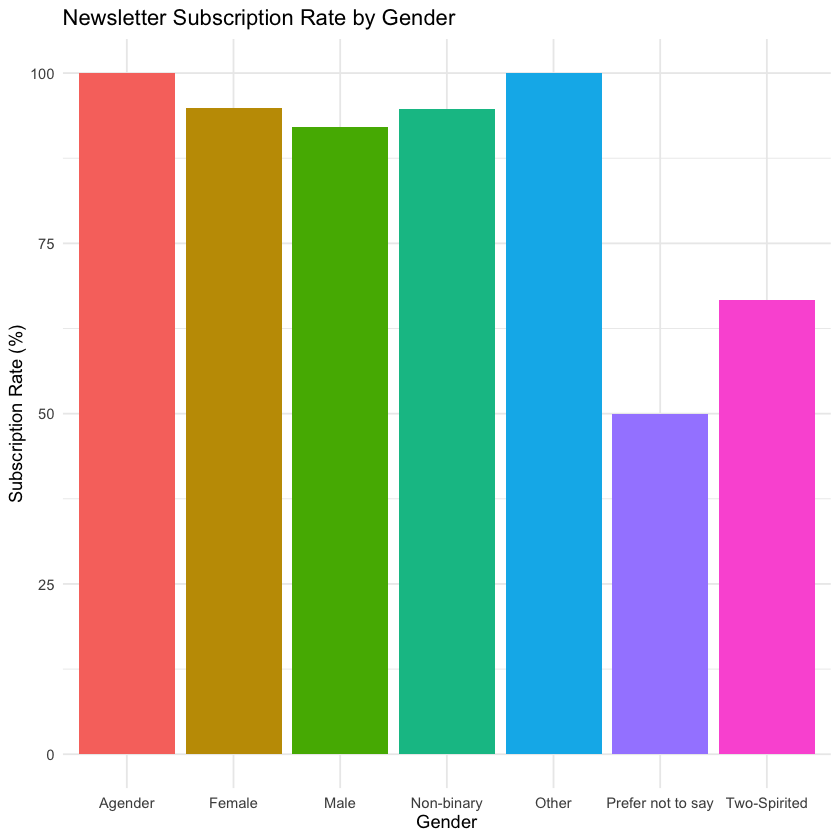

In [ ]:
left_join(players, sessions) |>
  group_by(gender) |>
  summarise(subscription_rate = mean(subscribe == TRUE) * 100) |>
  ggplot(aes(x = gender, y = subscription_rate, fill = gender)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Newsletter Subscription Rate by Gender",
    x = "Gender",
    y = "Subscription Rate (%)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

### Subscription Rate by Age

Joining with `by = join_by(hashedEmail)`
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


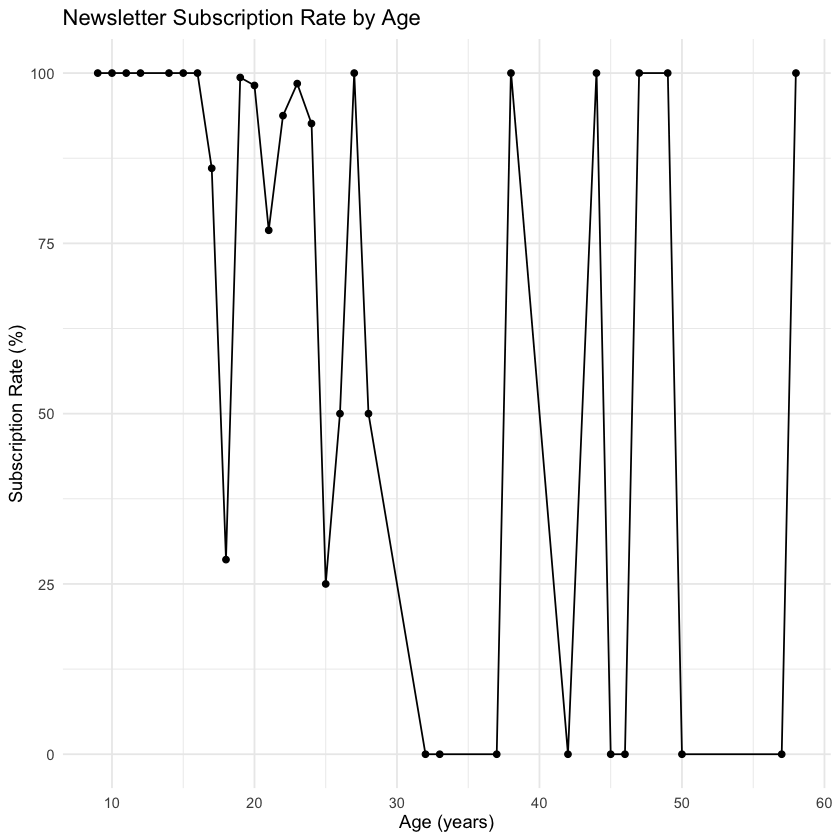

In [ ]:
left_join(players, sessions) %>%
  group_by(Age) %>%
  summarise(subscription_rate = mean(subscribe == TRUE) * 100) %>%
  ggplot(aes(x = Age, y = subscription_rate)) +
  geom_point() +
  geom_line() +
  labs(
    title = "Newsletter Subscription Rate by Age",
    x = "Age (years)",
    y = "Subscription Rate (%)"
  ) +
  theme_minimal()

### Distribution of total playtime by subscription status

Joining with `by = join_by(hashedEmail)`


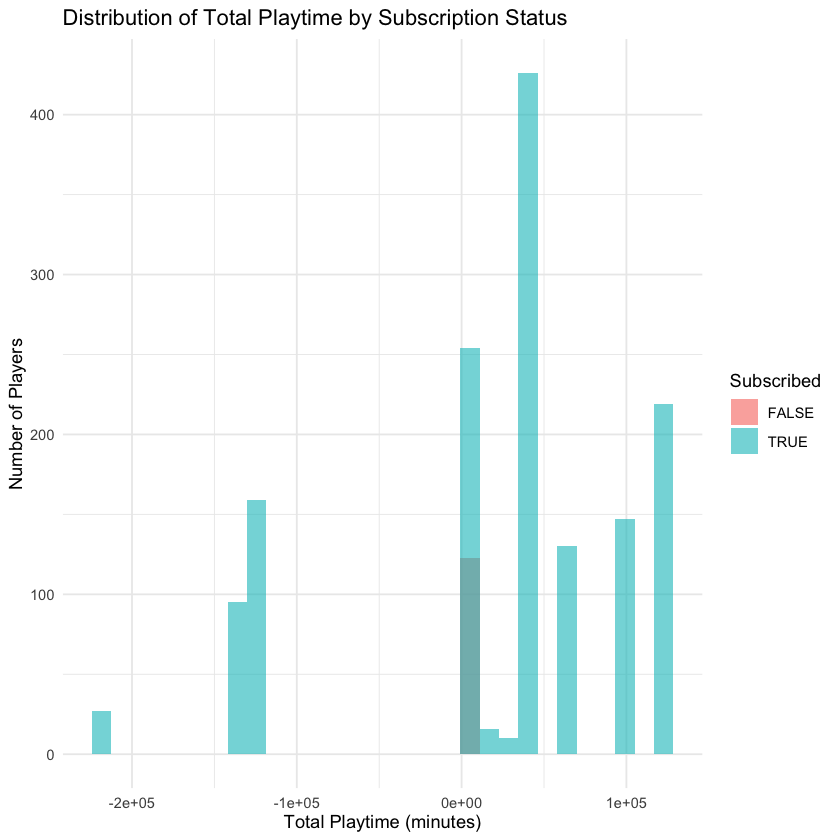

In [76]:
left_join(players, sessions) |>
  group_by(hashedEmail) |>
  mutate(total_playtime = sum(as.numeric(difftime(end_time, start_time, units = "hours")), na.rm = TRUE)) |>
  ggplot(aes(x = total_playtime, fill = subscribe)) +
  geom_histogram(position = "identity", alpha = 0.6, bins = 30) +
  labs(
    title = "Distribution of Total Playtime by Subscription Status",
    x = "Total Playtime (minutes)",
    y = "Number of Players",
    fill = "Subscribed"
  ) +
  theme_minimal()
